## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  40.237950  1652.643484  0.116203  6.138081  1.250506
1  83.717079   719.401567  0.652247  1.108150  1.321839
2  94.710696  1602.460674  0.962321  2.518187  1.616287
3  17.698866   534.314059  0.568913  7.768314  1.565020
4  15.340252   771.984237  0.428241  9.909259  1.781964


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9502999	total: 69.3ms	remaining: 1m 9s
1:	learn: 0.9396833	total: 70.1ms	remaining: 35s
2:	learn: 0.9301391	total: 70.7ms	remaining: 23.5s
3:	learn: 0.9225567	total: 71.3ms	remaining: 17.7s
4:	learn: 0.9106565	total: 71.9ms	remaining: 14.3s
5:	learn: 0.9000210	total: 72.4ms	remaining: 12s
6:	learn: 0.8917338	total: 73ms	remaining: 10.3s
7:	learn: 0.8822718	total: 73.5ms	remaining: 9.11s
8:	learn: 0.8728421	total: 74ms	remaining: 8.14s
9:	learn: 0.8646263	total: 74.5ms	remaining: 7.37s
10:	learn: 0.8564887	total: 75ms	remaining: 6.74s
11:	learn: 0.8486721	total: 75.4ms	remaining: 6.21s
12:	learn: 0.8396604	total: 75.9ms	remaining: 5.76s
13:	learn: 0.8315614	total: 76.4ms	remaining: 5.38s
14:	learn: 0.8215068	total: 76.8ms	remaining: 5.04s
15:	learn: 0.8154280	total: 77.3ms	remaining: 4.75s
16:	learn: 0.8070996	total: 77.8ms	remaining: 4.5s
17:	learn: 0.7987019	total: 78.1ms	remaining: 4.26s
18:	learn: 0.7904928	total: 78.5ms	remaining: 4.05s
19:

87:	learn: 0.4252327	total: 108ms	remaining: 1.12s
88:	learn: 0.4216536	total: 109ms	remaining: 1.11s
89:	learn: 0.4188030	total: 109ms	remaining: 1.1s
90:	learn: 0.4160470	total: 110ms	remaining: 1.09s
91:	learn: 0.4128947	total: 110ms	remaining: 1.09s
92:	learn: 0.4098192	total: 111ms	remaining: 1.08s
93:	learn: 0.4070284	total: 111ms	remaining: 1.07s
94:	learn: 0.4033215	total: 111ms	remaining: 1.06s
95:	learn: 0.4001456	total: 112ms	remaining: 1.05s
96:	learn: 0.3974338	total: 112ms	remaining: 1.04s
97:	learn: 0.3949061	total: 113ms	remaining: 1.04s
98:	learn: 0.3918933	total: 113ms	remaining: 1.03s
99:	learn: 0.3897125	total: 114ms	remaining: 1.02s
100:	learn: 0.3870537	total: 114ms	remaining: 1.01s
101:	learn: 0.3843894	total: 115ms	remaining: 1.01s
102:	learn: 0.3822265	total: 115ms	remaining: 1s
103:	learn: 0.3793042	total: 116ms	remaining: 995ms
104:	learn: 0.3763362	total: 116ms	remaining: 988ms
105:	learn: 0.3740194	total: 116ms	remaining: 982ms
106:	learn: 0.3715684	total: 

264:	learn: 0.1738861	total: 187ms	remaining: 517ms
265:	learn: 0.1732623	total: 187ms	remaining: 517ms
266:	learn: 0.1726828	total: 188ms	remaining: 515ms
267:	learn: 0.1720460	total: 188ms	remaining: 514ms
268:	learn: 0.1713561	total: 189ms	remaining: 512ms
269:	learn: 0.1707217	total: 189ms	remaining: 511ms
270:	learn: 0.1700933	total: 190ms	remaining: 510ms
271:	learn: 0.1693967	total: 190ms	remaining: 508ms
272:	learn: 0.1688245	total: 190ms	remaining: 507ms
273:	learn: 0.1682318	total: 191ms	remaining: 506ms
274:	learn: 0.1676955	total: 191ms	remaining: 504ms
275:	learn: 0.1671846	total: 192ms	remaining: 503ms
276:	learn: 0.1664683	total: 192ms	remaining: 502ms
277:	learn: 0.1659398	total: 192ms	remaining: 500ms
278:	learn: 0.1652841	total: 193ms	remaining: 499ms
279:	learn: 0.1648499	total: 193ms	remaining: 497ms
280:	learn: 0.1642913	total: 194ms	remaining: 496ms
281:	learn: 0.1637343	total: 194ms	remaining: 494ms
282:	learn: 0.1630527	total: 195ms	remaining: 493ms
283:	learn: 

497:	learn: 0.0963805	total: 290ms	remaining: 292ms
498:	learn: 0.0963227	total: 290ms	remaining: 291ms
499:	learn: 0.0962172	total: 291ms	remaining: 291ms
500:	learn: 0.0961131	total: 291ms	remaining: 290ms
501:	learn: 0.0957857	total: 292ms	remaining: 289ms
502:	learn: 0.0957212	total: 292ms	remaining: 289ms
503:	learn: 0.0955084	total: 292ms	remaining: 288ms
504:	learn: 0.0954537	total: 293ms	remaining: 287ms
505:	learn: 0.0953518	total: 293ms	remaining: 286ms
506:	learn: 0.0950287	total: 294ms	remaining: 285ms
507:	learn: 0.0949753	total: 294ms	remaining: 285ms
508:	learn: 0.0949229	total: 294ms	remaining: 284ms
509:	learn: 0.0948234	total: 295ms	remaining: 283ms
510:	learn: 0.0943307	total: 295ms	remaining: 282ms
511:	learn: 0.0940150	total: 296ms	remaining: 282ms
512:	learn: 0.0937014	total: 296ms	remaining: 281ms
513:	learn: 0.0936506	total: 296ms	remaining: 280ms
514:	learn: 0.0936008	total: 297ms	remaining: 280ms
515:	learn: 0.0935520	total: 297ms	remaining: 279ms
516:	learn: 

681:	learn: 0.0631630	total: 368ms	remaining: 172ms
682:	learn: 0.0630214	total: 369ms	remaining: 171ms
683:	learn: 0.0627684	total: 369ms	remaining: 171ms
684:	learn: 0.0623915	total: 370ms	remaining: 170ms
685:	learn: 0.0621454	total: 370ms	remaining: 169ms
686:	learn: 0.0618991	total: 371ms	remaining: 169ms
687:	learn: 0.0618273	total: 371ms	remaining: 168ms
688:	learn: 0.0615869	total: 371ms	remaining: 168ms
689:	learn: 0.0615165	total: 372ms	remaining: 167ms
690:	learn: 0.0612816	total: 372ms	remaining: 167ms
691:	learn: 0.0611590	total: 373ms	remaining: 166ms
692:	learn: 0.0611073	total: 374ms	remaining: 165ms
693:	learn: 0.0610612	total: 374ms	remaining: 165ms
694:	learn: 0.0609406	total: 375ms	remaining: 164ms
695:	learn: 0.0607004	total: 375ms	remaining: 164ms
696:	learn: 0.0606458	total: 375ms	remaining: 163ms
697:	learn: 0.0604093	total: 376ms	remaining: 163ms
698:	learn: 0.0603553	total: 376ms	remaining: 162ms
699:	learn: 0.0601211	total: 377ms	remaining: 161ms
700:	learn: 

911:	learn: 0.0368556	total: 472ms	remaining: 45.5ms
912:	learn: 0.0368322	total: 472ms	remaining: 45ms
913:	learn: 0.0368091	total: 473ms	remaining: 44.5ms
914:	learn: 0.0367219	total: 473ms	remaining: 44ms
915:	learn: 0.0367026	total: 474ms	remaining: 43.4ms
916:	learn: 0.0366836	total: 474ms	remaining: 42.9ms
917:	learn: 0.0365780	total: 475ms	remaining: 42.4ms
918:	learn: 0.0364298	total: 475ms	remaining: 41.9ms
919:	learn: 0.0363276	total: 475ms	remaining: 41.3ms
920:	learn: 0.0363046	total: 476ms	remaining: 40.8ms
921:	learn: 0.0362044	total: 476ms	remaining: 40.3ms
922:	learn: 0.0360655	total: 476ms	remaining: 39.8ms
923:	learn: 0.0359674	total: 477ms	remaining: 39.2ms
924:	learn: 0.0358319	total: 477ms	remaining: 38.7ms
925:	learn: 0.0356953	total: 478ms	remaining: 38.2ms
926:	learn: 0.0356171	total: 478ms	remaining: 37.6ms
927:	learn: 0.0354937	total: 478ms	remaining: 37.1ms
928:	learn: 0.0353622	total: 479ms	remaining: 36.6ms
929:	learn: 0.0352577	total: 479ms	remaining: 36ms

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

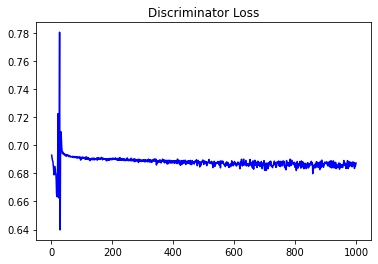

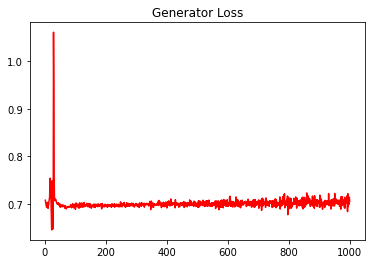

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.8392394792759724


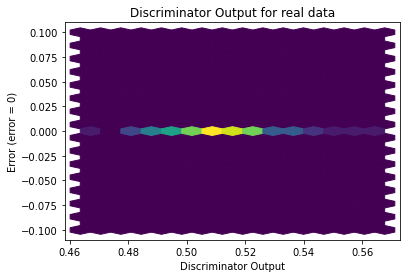

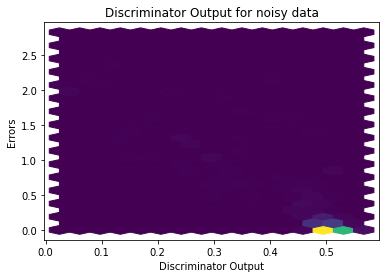

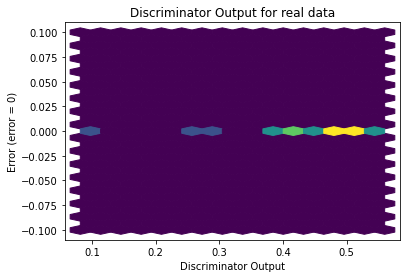

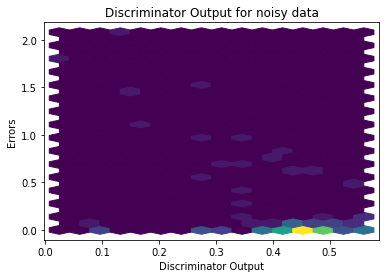

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


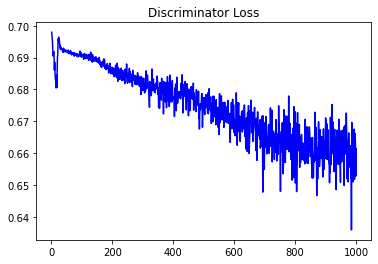

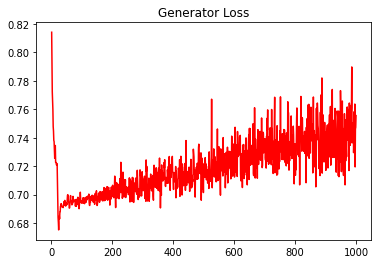

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.7463838500989121


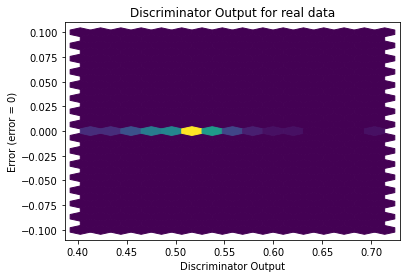

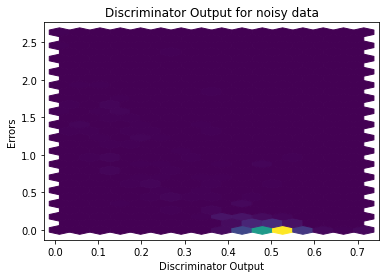

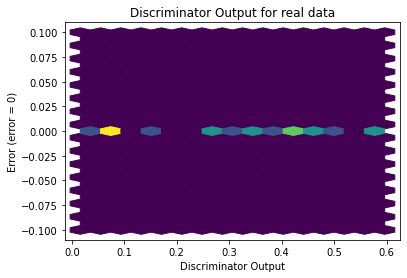

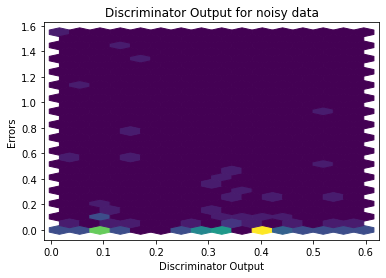

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1483]], requires_grad=True)
